In [1]:
# environment
import matplotlib.font_manager as fm
import numpy as np
import random as rand
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
import os 
import math as mt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
%matplotlib notebook

cwd = os.getcwd()
pwd = os.path.abspath(os.path.join(cwd, os.pardir))
fontloc = pwd + '/Fonts/SFMono-Regular.otf'
font = fm.FontProperties(fname = fontloc,size = 8); prop = font
proplr = fm.FontProperties(fname = fontloc,size = 12)

fontlocit = pwd + '/Fonts/SFMono-RegularItalic.otf'
fontit = fm.FontProperties(fname = fontlocit,size = 8)
fontsmall = fm.FontProperties(fname = fontloc,size = 8)

#ticks font
def ticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)
        
def xticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
        
def yticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)

@ticker.FuncFormatter
def major_formatter(x, pos):
    label = str("{0:.1f}".format(x)) if x < 0 else str("{0:.2f}".format(x))
    return label

# Geometric approach to Data Assimilation

Write the cost function for 4D-Var, assuming background error covariance matrix $\mathbf{B}$ = 0 for simplicity.

$$\mathcal{J}(\mathbf{x}) = \,\Delta\mathbf{x}^\mathrm{T}\mathbf{\,Q}^{-1}\Delta\mathbf{x} + \Delta\mathbf{\,y}^\mathrm{T}\mathbf{\,R}^{-1}\Delta\mathbf{y}$$ 

where

$\Delta\mathbf{x}\in \mathbb{R}^{\mathrm{M}},\;\Delta\mathbf{y}\in \mathbb{R}^{\mathrm{N}}\;,\mathbf{x}\in \mathbb{R}^{\mathrm{M}},\;\mathbf{y}\in \mathbb{R}^{\mathrm{N}},\; \mathbf{\,Q}^{-1} \in \mathbb{R}^{\mathrm{M}\times\mathrm{M}},\;\mathbf{R}^{-1} \in \mathbb{R}^{\mathrm{N}\times\mathrm{N}},\;\mathbf{\Delta y} = \mathbf{y}_k - \mathbf{H\,x}_k$ and $\mathbf{\Delta x} = \mathbf{x}_k - \mathcal{M}_{k:k-1}\mathbf{x}_{k-1}$. In geometric sense, $\mathbf{x}$ captures the dynamic mapping of the state variable in time such that 

$$\mathbf{\Delta x} = \mathbf{x}_k - \mathcal{M}_{k:k-1}\mathbf{x}_{k-1} \equiv \vec{x}(t) - \mathcal{M}(t,\delta t)\,\vec{x}(t - \delta t).$$



## Lyapunov Spectrum

$$\Lambda = \frac{1}{2}\lim_{\;t\,\gg\,t_\mathsf{o}}\frac{1}{|t - t_\mathsf{o}|}\mathrm{log}_\mathcal{e}\big|\mathbb{M}^\mathrm{T}\mathbb{M}\big|$$

$$x_t  = \mathcal{M}_{t:t-1} \cdot x_{t-1} + \epsilon$$

$\Delta\mathsf{T}(t) = \mathbb{M}[t,\Delta\mathsf{T}(t_\mathsf{o})]\,\Delta\mathsf{T}(t_\mathsf{o})$

$\mathcal{M}_{t:t-1} \equiv \mathbb{M}[t,\Delta\mathsf{T}(t_\mathsf{o})]$

$$\lim_{\;t\,\gg\,t_\mathsf{o}}\mathrm{log}_\mathcal{e}\Bigg[\frac{||\mathcal{M}_{t:t_\mathsf{o}}\cdot\Delta\mathsf{T}(t_\mathsf{o})||}{||\Delta\mathsf{T}(t_\mathsf{o})||}\Bigg]^{{1}/{2|t - t_\mathsf{o}|}}$$

$\Lambda \rightarrow \mathrm{log}_\mathcal{e}\sum_{k}e^{\mathsf{L}_k}$ where $\mathsf{L}_k$ = eig(C) < 0 $\forall$ $k$


$\langle\mathsf{T_O,T_A}\rangle \equiv \langle\mathsf{T_O}(t),\mathsf{T_A}(t + \tau)\rangle = \int_{-\infty}^{+\infty} \mathsf{T_O}(t)\,\mathsf{T_A}(t + \tau)\,\mathrm{d}t$

'$\langle\rangle$' denotes (co)variance 

$\mathsf{N}_e$ = 25, 

$\sigma_{\mathsf{O},o}$ = 1.0, 

$\sigma_{\mathsf{A},o}$ = 2.0, 

spin up = 100 steps, 

$\mathsf{T_O = T_A}$ = 0.0, 

$\sigma_{\mathsf{O},f}$ = 1.0, 

$\sigma_{\mathsf{A},f}$ = 2.0.

Cross-localisation ~ 0.1

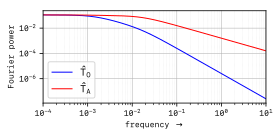

In [9]:
import cmath 
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

#fourier space
crosssec = 0.1
fr = np.arange(0.0001,10.0,0.0001)
i  = complex(0,1)
gamma = crosssec**2
a = []; b = []

m = 10; Coo = -0.1; Coa = 0.1; Cao = 0.01; Caa = -0.1
C = np.array([[Coo, Coa], [Cao, Caa]])

for f in fr:
    D = (2*mt.pi*i*f - Caa)*(2*mt.pi*i*m*f - Coo) - Coa * Cao 
    a.append(abs(gamma*(Coa/D)))
    b.append(abs(gamma*((2*mt.pi*i*m*f - Coo)/D)))

plt.figure(figsize=(4,2),dpi=200);
plt.plot(fr, a, c='b', linewidth=1.)
plt.plot(fr, b, c='r', linewidth=1.)
ax = gca(); ticks(ax,8); plt.grid(linewidth=0.5); 
ax.autoscale(enable=True, axis='x', tight=True);
plt.xlabel(r'frequency $\rightarrow$',fontproperties=font,fontsize=8);
plt.ylabel('Fourier power',fontproperties=font,fontsize=8);
l1 = ax.legend([r'$\mathregular{\hat{T}_O}$',r'$\mathregular{\hat{T}_A}$'], loc='best', ncol=1)
plt.setp(l1.texts, family='SF Mono', fontsize=10);
ax.set_yscale('log'); ax.set_xscale('log')
ax.grid(b=True, which='minor', linewidth=0.10, linestyle='--')
plt.tight_layout(); 

plt.savefig("/Users/asi066/Desktop/Fig3.png",dpi=800)